## 누락값?

- 누락값은 ? Nan, NaN, nan NA
- 누락값은 없는 값으로 이상치와 전혀 다르다. but 0은 아니다!!
- 누락값이 생기는 원인은?

1. 사람의 실수 (데이털르 기입하는 사람의 실수)
2. 데이터를 분석하는 사람의 실수 (데이터 병합에서 잘못된 병합의 경우 na값이 발생)

In [4]:
import pandas as pd

In [5]:
ebola = pd.read_csv(r'C:/Users/rsh73/Desktop/country_timeseries.csv')

In [5]:
ebola.isnull().sum() # 각 열의 결측치 개수를 확인

Date                     0
Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64

In [6]:
ebola.info() # ebola 데이터의 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

## na 값을 날려야 하나 살려야하나?
- 실제 80% 이상의 na 값은 날리는 것이 맞다.
- 만약 데이터가 na 값을 날려서 남아있지 않는 경우 분석을 할 수 없다.
- na 값이 60~70% 라면 그래도 살려보자!
- 어떻게 살리는지가 가장 중요한 부분

In [7]:
ebola ## na값을 시각화해서 간단하게 보자

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
import missingno as msno

<AxesSubplot:>

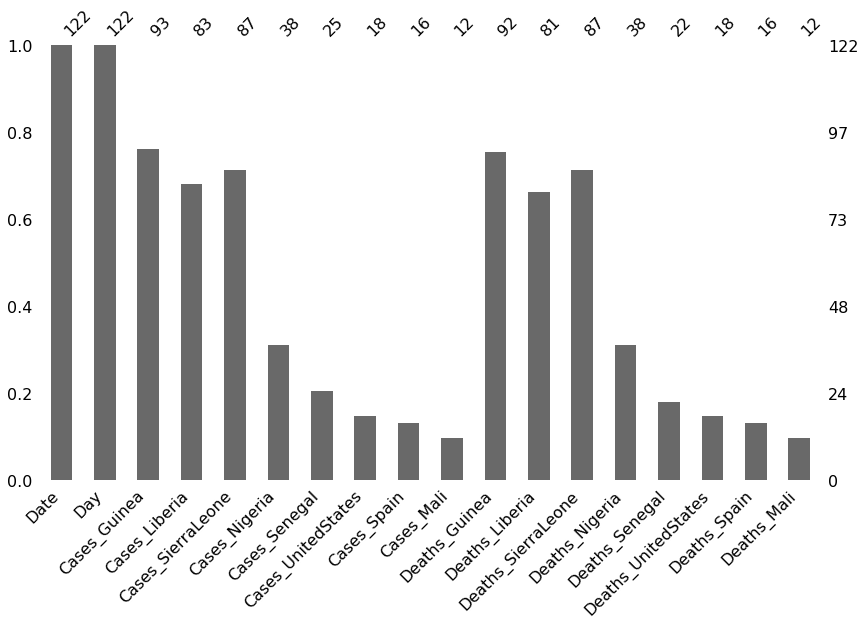

In [7]:
msno.bar(df=ebola,figsize=(14,8)) # 각 결측치를 막대그래프 형태로 시각화

<AxesSubplot:>

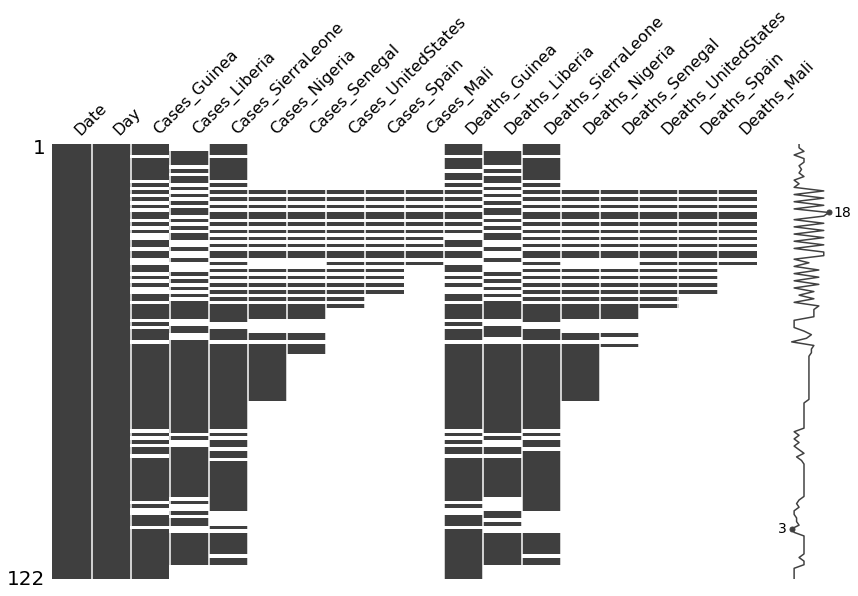

In [9]:
msno.matrix(df=ebola,figsize=(14,8)) 
# 매트릭스 형태로 결측치를 시각화한다.

## 누락값을 실제로 처리해보자! 
- na 값을 채우는 방법 
1. fillna()

In [10]:
ebola.iloc[0:10,0:5] # 행,열

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,NaN,10030.0
1,1/4/2015,288,2775.0,NaN,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,NaN,8157.0,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,NaN,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,NaN,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [11]:
ebola.iloc[0:10,0:5]['Cases_Liberia'].mean()
# nan 값에 0을 넣지 않았을 때

8049.166666666667

In [12]:
ebola.fillna(0).iloc[0:10,0:5]['Cases_Liberia'].mean()
# nan 값에 0을 넣었을 때

4829.5

## 다른 방법으로 누락값을 대체하는 방법
- fillna(method=' ')
- ffill : 누락값이 나타나기 전의 값으로 누락값을 변경
- bfill : 누락값이 나타난 이후 첫 번째 값으로 앞쪽의 누락값을 변경

In [13]:
ebola.fillna(method='ffill').iloc[0:10,0:5]['Cases_Liberia'].mean()

8036.25

In [14]:
ebola.fillna(method='bfill').iloc[0:10,0:5]['Cases_Liberia'].mean()

8046.6

In [15]:
# 평균으로 대체
ebola.iloc[0:10,0:5]['Cases_Liberia'].mean()

8049.166666666667

In [18]:
# 평균 값 8049.17 로 대체
ebola.fillna(8049.17).iloc[0:10,0:5]['Cases_Liberia'].mean()

8049.168

## 누락값을 대체하는 방법
- 보간법
- interploate(method=' ')
- 선형보간법
- spline 보간법

<AxesSubplot:>

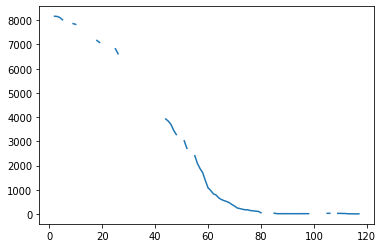

In [19]:
ebola['Cases_Liberia'].plot() # 누락값이 많은 걸 알 수 있다.

<AxesSubplot:>

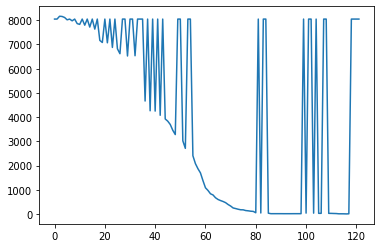

In [20]:
ebola.fillna(8049.17)['Cases_Liberia'].plot() 
# 누락값을 8049.17로 대체했을 때(평균)

## 스플라인 보간법 (선형 보간법)
- 각 데이터의 포인트 구간별로 낮은 수준의 다항식 보간을 사용, 직선으로 연결되는 보간법 보다는 좀 더 부드럽게 연결이 되어서 다항식 항목을 선택한다.
- fillna 로 동일한 값을 채우기 보다는 전후값의 중간값을 채운다.

In [24]:
ebola.interpolate(method='quadratic')

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.000000,NaN,10030.00000,NaN,NaN,NaN,NaN,NaN,1786.000000,NaN,2977.000000,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.000000,NaN,9780.00000,NaN,NaN,NaN,NaN,NaN,1781.000000,NaN,2943.000000,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.000000,8166.0,9722.00000,NaN,NaN,NaN,NaN,NaN,1767.000000,3496.0,2915.000000,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,2753.419091,8157.0,9712.06134,NaN,NaN,NaN,NaN,NaN,1756.678716,3496.0,2880.357341,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.000000,8115.0,9633.00000,NaN,NaN,NaN,NaN,NaN,1739.000000,3471.0,2827.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.000000,8.0,6.00000,NaN,NaN,NaN,NaN,NaN,66.000000,6.0,5.000000,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
ebola.interpolate(method='quadratic').iloc[0:10,0:5]['Cases_Liberia'].mean()

8025.584342975371

<AxesSubplot:>

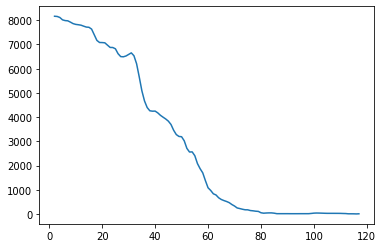

In [31]:
ebola.interpolate(method='quadratic')['Cases_Liberia'].plot()

# quadratic : 부드러운 보정

<AxesSubplot:>

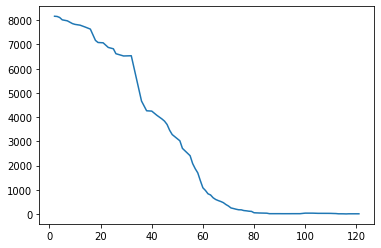

In [32]:
ebola.interpolate(method='linear')['Cases_Liberia'].plot()

# linear : 선형보정

## 열과 피벗
- 엑셀에서 피벗의 개념
- melt 메서드를 이용해서 깔끔하게 데이터를 정리하는데 유용하다.

#### melt의 메서드 인자
- id_vars : 위치를 그대로 유지할 열의 이름을 지정
- value_vars : 행으로 위치를 변경할 열의 이름을 지정
- var_name : value_vars로 위치 변경할 열의 이름을 지정 
- value_name : var_name 의 위치로 변경할 열의 데이터를 저장한 열의 이름

In [35]:
pew = pd.read_csv(r'C:/Users/rsh73/Desktop/pew.csv')

In [36]:
pd.melt(pew,id_vars='religion') # religion 이라는 열의 위치를 그대로 저장

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [37]:
pd.melt(pew, id_vars = 'religion', var_name='income',value_name='count')

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


## melt는 언제 사용하나? 

In [38]:
bill = pd.read_csv(r'C:/Users/rsh73/Desktop/billboard.csv')

In [40]:
bill.head()

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
pd.melt(bill,id_vars=['year','artist','track','time','date.entered'],
       var_name='week',value_name='rating')

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


## value에서 특정 패턴을 찾을 수도 있지만 칼럼에서도 어떠한 패턴을 찾을 수 있다. 

In [42]:
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [43]:
ebola_sp1 = pd.melt(ebola, id_vars=['Date','Day'])

In [45]:
variable_sp1 = ebola_sp1.variable.str.split('_')

In [44]:
ebola_sp1

,Date,Day,variable,value
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0
...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN
1948,3/26/2014,4,Deaths_Mali,NaN
1949,3/25/2014,3,Deaths_Mali,NaN
1950,3/24/2014,2,Deaths_Mali,NaN


In [47]:
variable_sp1

0       [Cases, Guinea]
1       [Cases, Guinea]
2       [Cases, Guinea]
3       [Cases, Guinea]
4       [Cases, Guinea]
             ...       
1947     [Deaths, Mali]
1948     [Deaths, Mali]
1949     [Deaths, Mali]
1950     [Deaths, Mali]
1951     [Deaths, Mali]
Name: variable, Length: 1952, dtype: object

In [49]:
variable_sp1.str.get(0)

0        Cases
1        Cases
2        Cases
3        Cases
4        Cases
         ...  
1947    Deaths
1948    Deaths
1949    Deaths
1950    Deaths
1951    Deaths
Name: variable, Length: 1952, dtype: object

In [50]:
variable_sp1.str.get(1)

0       Guinea
1       Guinea
2       Guinea
3       Guinea
4       Guinea
         ...  
1947      Mali
1948      Mali
1949      Mali
1950      Mali
1951      Mali
Name: variable, Length: 1952, dtype: object

In [51]:
variable_sp1[0][0]

'Cases'

In [53]:
variable_sp1.str.get(0)

0        Cases
1        Cases
2        Cases
3        Cases
4        Cases
         ...  
1947    Deaths
1948    Deaths
1949    Deaths
1950    Deaths
1951    Deaths
Name: variable, Length: 1952, dtype: object

In [54]:
variable_sp1.str.get(1)

0       Guinea
1       Guinea
2       Guinea
3       Guinea
4       Guinea
         ...  
1947      Mali
1948      Mali
1949      Mali
1950      Mali
1951      Mali
Name: variable, Length: 1952, dtype: object

In [59]:
ebola_sp1['case_vr'] = variable_sp1.str.get(0)
ebola_sp1['values_vr'] = variable_sp1.str.get(1)

In [60]:
ebola_sp1

,Date,Day,variable,value,case_vr,values_vr
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea
...,...,...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN,Deaths,Mali
1948,3/26/2014,4,Deaths_Mali,NaN,Deaths,Mali
1949,3/25/2014,3,Deaths_Mali,NaN,Deaths,Mali
1950,3/24/2014,2,Deaths_Mali,NaN,Deaths,Mali
